<a href="https://colab.research.google.com/github/sftSalman/pytorch/blob/main/Final_planer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [2]:

import numpy as np

def layer_sizes_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(5, 3)
    Y_assess = np.random.randn(2, 3)
    return X_assess, Y_assess

def initialize_parameters_test_case():
    n_x, n_h, n_y = 2, 4, 1
    return n_x, n_h, n_y


def forward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    b1 = np.random.randn(4,1)
    b2 = np.array([[ -1.3]])

    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': b1,
     'b2': b2}

    return X_assess, parameters

def compute_cost_test_case():
    np.random.seed(1)
    Y_assess = (np.random.randn(1, 3) > 0)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))
    
    return a2, Y_assess, parameters

def backward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = (np.random.randn(1, 3) > 0)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
         [-0.05225116,  0.02725659, -0.02646251],
         [-0.02009721,  0.0036869 ,  0.02883756],
         [ 0.02152675, -0.01385234,  0.02599885]]),
  'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
  'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
         [-0.05229879,  0.02726335, -0.02646869],
         [-0.02009991,  0.00368692,  0.02884556],
         [ 0.02153007, -0.01385322,  0.02600471]]),
  'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}
    return parameters, cache, X_assess, Y_assess

def update_parameters_test_case():
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
 'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
 'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
 'b2': np.array([[  9.14954378e-05]])}

    grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
        [ 0.00082222, -0.00700776],
        [-0.00031831,  0.0028636 ],
        [-0.00092857,  0.00809933]]),
 'dW2': np.array([[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03,
          -2.55715317e-03]]),
 'db1': np.array([[  1.05570087e-07],
        [ -3.81814487e-06],
        [ -1.90155145e-07],
        [  5.46467802e-07]]),
 'db2': np.array([[ -1.08923140e-05]])}
    return parameters, grads

def nn_model_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = (np.random.randn(1, 3) > 0)
    return X_assess, Y_assess

def predict_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
     'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
     'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
     'b2': np.array([[  9.14954378e-05]])}
    return parameters, X_assess


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [4]:
X,Y = load_planar_dataset()

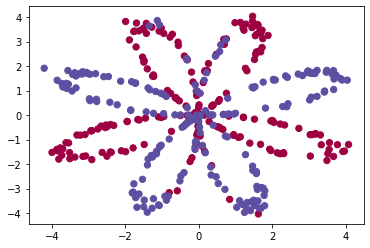

In [5]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

In [6]:
shape_x = X.shape
shape_y= Y.shape

In [7]:
print(shape_x,'\n',shape_y)

(2, 400) 
 (1, 400)


In [8]:
m = X.shape[1]
print(m)

400


In [9]:
print(X[1].T)

[ 3.57611415e+00 -1.48217090e+00 -1.27995533e+00 -2.06437997e+00
  2.88910878e+00 -4.03512400e+00  3.24255518e+00 -8.53952855e-01
  2.47793820e+00  1.81117216e+00  3.45270042e+00 -3.44017638e+00
  2.10549647e+00  1.81380501e+00  3.30267114e+00  4.18131769e-01
  3.09636434e+00  1.33096004e+00  3.78708833e+00  3.67113005e+00
  1.77614048e+00  2.76152023e+00  3.25544108e+00  3.46859174e+00
  2.48644177e+00  3.77377130e+00  3.60609974e+00  3.11254032e+00
  3.57519059e+00  2.61610253e+00  3.71658382e+00  3.70508842e+00
  3.83692688e+00  4.03764347e+00  3.66278004e+00  2.58286653e+00
  3.46644213e+00  1.81009586e+00 -1.49385117e+00  4.15245354e-01
  2.27195929e+00  3.36955063e+00  3.12091874e+00 -1.81920100e+00
  8.92965442e-01  2.58295944e+00  3.90987436e-01 -1.63847358e+00
  3.58745594e-01 -1.20025645e+00 -6.62747682e-01  6.31091667e-01
  1.91148705e+00  5.61807626e-01 -1.64789940e-01 -1.67941725e+00
 -1.52497835e+00 -1.68684842e+00 -1.45714301e+00 -1.77895038e+00
 -3.48915965e-02 -1.52257

In [10]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


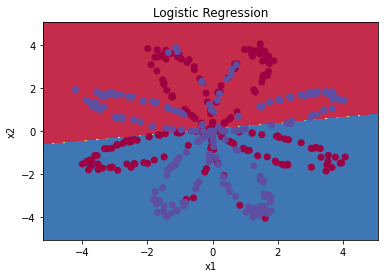

In [11]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [12]:
def layer_sizes(X,Y):
  n_x = X.shape[0]
  n_h =4
  n_y=Y.shape[0]

  return n_x,n_h,n_y

In [13]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [14]:
def initialize_parameters(n_x,n_h,n_y):
  W1 = np.random.randn(n_h,n_x)*0.01
  b1 = np.zeros([n_h,1])
  W2 = np.random.randn(n_y,n_h)
  b2 = np.zeros([n_y,1])

  parameters= {
      'W1':W1,
      'b1':b1,
      'W2':W2,
      'b2':b2

  }
  return parameters

In [15]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01144724  0.00901591]
 [ 0.00502494  0.00900856]
 [-0.00683728 -0.0012289 ]
 [-0.00935769 -0.00267888]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.53035547 -0.69166075 -0.39675353 -0.6871727 ]]
b2 = [[0.]]


In [16]:
def forward_propagation(X,parameters):

  W1= parameters['W1']
  b1=parameters['b1']
  W2=parameters['W2']
  b2=parameters['b2']

  Z1 = np.dot(W1,X)+b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2,A1)+b2
  A2 = sigmoid(Z2)

  cache={
      'Z1':Z1,
      'A1':A1,
      'Z2':Z2,
      'A2':A2

  }
  return A2, cache

In [17]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700113 -1.3076660128732143 0.21287768171914198


In [18]:
def compute_cost(A2,Y, parameters):
  m= Y.shape[1]
  logprob = np.multiply(np.log(A2),Y)+((1-Y)*np.log(1-A2))
  cost =-(1/m)*np.sum(logprob)
  cost = np.squeeze(cost)
  return cost

In [19]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [20]:
def backward_propagation(parameters, cache,X,Y):
  m=X.shape[1]
  W1= parameters['W1']
  W2= parameters['W2']

  A1 = cache['A1']
  A2 = cache['A2']

  dZ2 = A2-Y
  dW2 = (1/m)*np.dot(dZ2,A1.T)
  db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
  dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
  dW1 = (1/m) * np.dot(dZ1, X.T)
  db1 = (1/m) * np.sum(dZ1, axis =1, keepdims = True)

  grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
  return grads

In [21]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [22]:
def update_parameters(parameters, grads,learning_rate=1.2):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2= parameters['b2']

  dW1 = grads['dW1']
  db1 = grads['db1']
  dW2 = grads['dW2']
  db2 = grads['db2']

  W1 = W1-learning_rate*dW1
  b1 = b1-learning_rate*db1
  W2 = W2-learning_rate*dW2
  b2 = b2-learning_rate*db2

  parameters={
      'W1':W1,
      'b1':b1,
      'W2':W2,
      'b2':b2}
  return parameters

In [23]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [24]:
def nn_model(X,Y,n_h,num_iterations=10000, print_cost=False):
  n_x = layer_sizes(X,Y)[0]
  n_y = layer_sizes(X,Y)[2]

  parameters = initialize_parameters(n_x,n_h,n_y)

  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']

  for i in range (0, num_iterations):
    A2,cache = forward_propagation(X,parameters)
    cost=compute_cost(A2,Y,parameters)
    grads = backward_propagation(parameters,cache,X,Y)
    parameters = update_parameters(parameters,grads)

    if print_cost and i % 1000==0:
      print('Cost after iteration %i: %f'%(i,cost))
  return  parameters

In [25]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.686836
Cost after iteration 1000: 0.000247
Cost after iteration 2000: 0.000119
Cost after iteration 3000: 0.000078
Cost after iteration 4000: 0.000058
Cost after iteration 5000: 0.000046
Cost after iteration 6000: 0.000038
Cost after iteration 7000: 0.000032
Cost after iteration 8000: 0.000028
Cost after iteration 9000: 0.000025
W1 = [[-0.76052203  1.46358016]
 [ 0.35525328 -0.72263077]
 [ 0.71594444 -1.34269279]
 [-0.79484852  1.5426396 ]]
b1 = [[ 0.26301365]
 [-0.07760817]
 [-0.26619291]
 [ 0.23635731]]
W2 = [[-3.43446218  1.0024385   2.96009081 -3.70622892]]
b2 = [[0.12100119]]


In [26]:
def predict(parameters ,X):
  A2,cache = forward_propagation(X,parameters)
  predictions = (A2>0.5)
  return predictions

In [27]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693108
Cost after iteration 1000: 0.280758
Cost after iteration 2000: 0.268653
Cost after iteration 3000: 0.261790
Cost after iteration 4000: 0.257294
Cost after iteration 5000: 0.254180
Cost after iteration 6000: 0.251923
Cost after iteration 7000: 0.250225
Cost after iteration 8000: 0.248907
Cost after iteration 9000: 0.247859


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

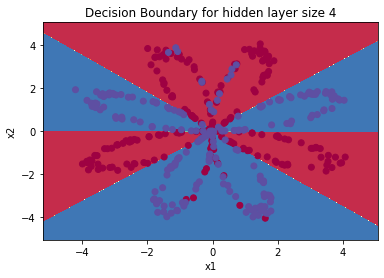

In [28]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

Accuracy for 1 hidden units: 61.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.75 %
Accuracy for 50 hidden units: 90.75 %


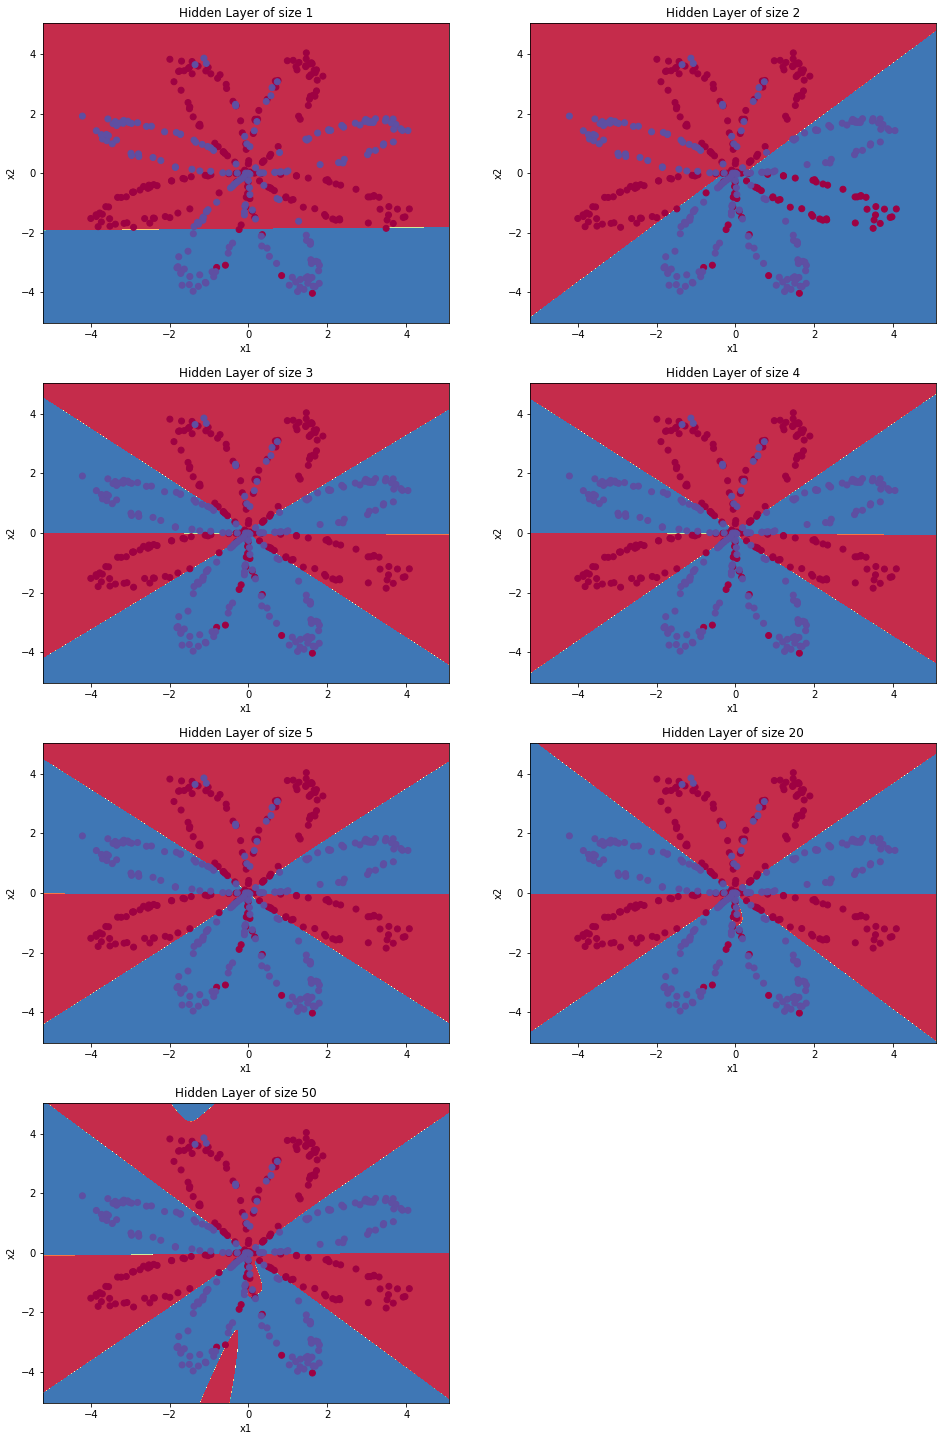

In [29]:


plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

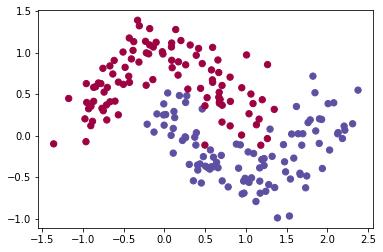

In [30]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);